<a href="https://colab.research.google.com/github/Dyakonov/Colab/blob/main/IMBP_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Первоначальная загрузка данных

Пока просто загружаем данные

Глобальные вопросы:
* где указаны целевые признаки?
* какая дельта между интервалами времени?

Вообще, тут вопрос - как это всё погружать в RNN - нужны равномерные интервалы

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
! cd ./drive

In [ ]:
! ls

drive  sample_data


In [ ]:
data_CALO = pd.read_csv("/content/drive/MyDrive/DATA/20231003_CALO.csv",
                        skiprows=3, nrows=139, sep=';',header=None, parse_dates=[0])
data_CALO

,0,1
0,2023-03-10 17:45:51,Measurement Started
1,2023-03-10 19:20:56,Box 13 paused
2,2023-03-10 19:22:38,Box 13 continued
3,2023-03-10 19:38:37,Box 3 paused
4,2023-03-10 19:40:26,Box 3 continued
...,...,...
134,2023-08-10 11:20:13,Box 15 continued
135,2023-09-10 11:01:05,Box 5 paused
136,2023-09-10 11:01:26,Box 5 continued
137,2023-09-10 11:02:25,Box 14 paused


In [ ]:
data_CALO2 = pd.read_csv("/content/drive/MyDrive/DATA/20231003_CALO.csv",
                        skiprows=146, sep=';',header=None, parse_dates=[0]) # , nrows=139
data_CALO2 # .tail()

# это вторая половина файла

,0,1,2,3,4,5,6,7,8
0,2023-03-10 17:46:51,32,0,"20,95","0,066",-,-,-,-
1,2023-03-10 17:47:51,32,0,"20,95","0,066",-,-,-,-
2,2023-03-10 17:48:51,32,0,"20,95","0,066",-,-,-,-
3,2023-03-10 17:49:51,1,0,"20,95","0,066",0,0,-,"0,000"
4,2023-03-10 17:50:52,1,0,"20,94","0,071",1,1,-,"0,004"
...,...,...,...,...,...,...,...,...,...
8398,2023-09-10 13:44:51,16,0,"20,86","0,525",26,106,"4,091","0,218"
8399,2023-09-10 13:45:51,32,0,"20,88","0,525",-,-,-,-
8400,2023-09-10 13:46:51,32,0,"21,07","0,182",-,-,-,-
8401,2023-09-10 13:47:52,32,0,"21,07","0,070",-,-,-,-


In [ ]:
data_ACT = pd.read_csv("/content/drive/MyDrive/DATA/20231017_ACT.CSV",
                        skiprows=3, sep=';', decimal=',') # ,header=None, parse_dates=[0] , nrows=139
data_ACT # .head()

# а тут дата и время разнесены

,Date,Time,CenA,CenF,Z,XA5,XA6,XA7,XA8,XA9,...,YF4.15,YF5.15,YF6.15,YF7.15,XT.15,YT.15,XT+YT.15,DistK.15,Speed.15,Unnamed: 546
0,17.10.2023,17:13,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.00,NaN
1,17.10.2023,17:14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.00,NaN
2,17.10.2023,17:15,0,0,3,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0.01,NaN
3,17.10.2023,17:16,5,2,11,1,2,2,1,3,...,0,0,0,0,0,0,0,1,0.00,NaN
4,17.10.2023,17:17,27,20,6,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13080,26.10.2023,19:13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,195780,0.00,NaN
13081,26.10.2023,19:14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,195780,0.00,NaN
13082,26.10.2023,19:15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,195780,0.00,NaN
13083,26.10.2023,19:16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,195780,0.00,NaN


In [ ]:
data_ACT_SleepAnalysis = pd.read_csv("/content/drive/MyDrive/DATA/20231017_ACT_SleepAnalysis.csv",
                        skiprows=27, sep=';', decimal=',', parse_dates=['Start Time', 'End Time'], nrows=1922) # ,header=None,  , nrows=139
data_ACT_SleepAnalysis # .head()

# а тут проблема 1й строки
# и лишний столбец

,Box,Count,Start Time,End Time,Duration,Epochs,Light/Dark,Unnamed: 7
0,NaN,NaN,[dd.MM.yyyy hh:mm:ss],[dd.MM.yyyy hh:mm:ss],[hh:mm:ss],NaN,NaN,NaN
1,1.0,1.0,17.10.2023 17:27:29,17.10.2023 17:28:59,00:01:30,9.0,Light,NaN
2,1.0,2.0,17.10.2023 17:30:59,17.10.2023 17:31:39,00:00:40,4.0,Light,NaN
3,1.0,3.0,17.10.2023 17:32:09,17.10.2023 17:32:49,00:00:40,4.0,Light,NaN
4,1.0,4.0,17.10.2023 17:32:59,17.10.2023 17:35:29,00:02:30,15.0,Light,NaN
...,...,...,...,...,...,...,...,...
1917,1.0,1917.0,24.10.2023 19:45:09,24.10.2023 19:50:29,00:05:20,32.0,Light,NaN
1918,1.0,1918.0,24.10.2023 19:50:49,24.10.2023 19:53:19,00:02:30,15.0,Light,NaN
1919,1.0,1919.0,24.10.2023 19:53:29,24.10.2023 19:54:59,00:01:30,9.0,Light,NaN
1920,1.0,1920.0,24.10.2023 19:55:49,26.10.2023 13:54:29,> 1 day,15112.0,Light,NaN


In [ ]:
data_ACT_SleepAnalysis2 = pd.read_csv("/content/drive/MyDrive/DATA/20231017_ACT_SleepAnalysis.csv",
                        skiprows=1953, sep=';', decimal=',') #, parse_dates=['dd.MM.yyyy hh:mm:ss-zzz']) # , parse_dates=['dd.MM.yyyy hh:mm:ss-zzz'], nrows=1922 ,header=None,  , nrows=139
data_ACT_SleepAnalysis2.head()

# тут проблемы с -zzz

,dd.MM.yyyy hh:mm:ss-zzz,BoxNr,X (cm),Y (cm),Z (cm),X1,X2,X3,X4,X5,...,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,Z12,Z13
0,17.10.2023 17:12:09-828,1,FFEF,FF9F,FFFF,1,1,1,1,0,...,1,1,1,1,1,1,1.0,1.0,1.0,1.0
1,17.10.2023 17:12:09-828,2,FFCF,FFFB,FFFF,1,1,1,1,0,...,1,1,1,1,1,1,1.0,1.0,1.0,1.0
2,17.10.2023 17:12:09-828,3,F9FF,FFF7,FFFF,1,1,1,1,1,...,1,1,1,1,1,1,1.0,1.0,1.0,1.0
3,17.10.2023 17:12:09-828,4,F3FF,FFFB,FFFF,1,1,1,1,1,...,1,1,1,1,1,1,1.0,1.0,1.0,1.0
4,17.10.2023 17:12:09-828,5,FFEF,FFF3,FFFF,1,1,1,1,0,...,1,1,1,1,1,1,1.0,1.0,1.0,1.0


In [ ]:
data_All = pd.read_csv("/content/drive/MyDrive/DATA/20231017_All.csv",
                        skiprows=20, sep=';', decimal=',', encoding='ISO-8859-1') # , parse_dates=['dd.MM.yyyy hh:mm:ss-zzz']) # , parse_dates=['dd.MM.yyyy hh:mm:ss-zzz'], nrows=1922 ,header=None,  , nrows=139
data_All.head()

# UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 803: invalid start byte
# тоже проблема 1 строки


,Date,Time,Animal No.,Box,S.Flow,Ref.O2,Ref.CO2,Flow,Temp,O2,...,CenF,PerT,PerA,PerF,DistK,DistD,Speed,Drink,Feed,Unnamed: 42
0,NaN,NaN,NaN,NaN,[l/min],[%],[%],[l/min],[°C],[%],...,[Cnts],[Cnts],[Cnts],[Cnts],[cm],[cm],[cm/s],[ml],[g],NaN
1,17.10.2023,18:12,633.0,1.0,"0,25","21,36","0,047","0,36","24,6","19,85",...,117,254,69,185,418,418,0,"0,25","0,22",NaN
2,17.10.2023,19:12,633.0,1.0,"0,25","21,51","0,049","0,36","24,4","20,42",...,274,1385,754,631,2676,2257,1,"0,64","0,56",NaN
3,17.10.2023,20:12,633.0,1.0,"0,25","21,54","0,049","0,36","24,4","20,20",...,8,105,36,69,2763,87,0,"0,64","0,56",NaN
4,17.10.2023,21:12,633.0,1.0,"0,25","21,50","0,048","0,36","24,2","20,45",...,329,1600,829,771,5133,2370,1,"0,64","0,56",NaN


In [ ]:
data_DFT = pd.read_csv("/content/drive/MyDrive/DATA/20231017_DFT.csv",
                        skiprows=3, header=None, nrows=296, sep=';', decimal=',', parse_dates=[0], index_col=False) # , encoding='ISO-8859-1', parse_dates=['dd.MM.yyyy hh:mm:ss-zzz']) # , parse_dates=['dd.MM.yyyy hh:mm:ss-zzz'], nrows=1922 ,header=None,  , nrows=139
data_DFT.tail()

# а тут что-то нет названия колонок


,0,1
291,2023-10-24 19:54:06,Box 10 paused
292,2023-10-24 19:54:08,Box 12 paused
293,2023-10-24 19:54:10,Box 14 paused
294,2023-10-24 19:54:13,Box 16 paused
295,2023-10-26 19:17:41,Measurement Stopped


In [ ]:
data_DFT[data_DFT.columns[0]]

0     2023-10-17 17:12:09
1     2023-10-17 20:23:25
2     2023-10-17 20:23:28
3     2023-10-17 20:24:44
4     2023-10-17 20:24:46
              ...        
291   2023-10-24 19:54:06
292   2023-10-24 19:54:08
293   2023-10-24 19:54:10
294   2023-10-24 19:54:13
295   2023-10-26 19:17:41
Name: 0, Length: 296, dtype: datetime64[ns]

In [ ]:
data_DFT2 = pd.read_csv("/content/drive/MyDrive/DATA/20231017_DFT.csv",
                        skiprows=308, sep=';', decimal=',') # , encoding='ISO-8859-1', parse_dates=['dd.MM.yyyy hh:mm:ss-zzz']) # , parse_dates=['dd.MM.yyyy hh:mm:ss-zzz'], nrows=1922 ,header=None,  , nrows=139
data_DFT2.head()

,Date,Time,Box1: Drink,Box1: Feed,Box2: Drink,Box2: Feed,Box3: Drink,Box3: Feed,Box4: Drink,Box4: Feed,...,Box12: Drink,Box12: Feed,Box13: Drink,Box13: Feed,Box14: Drink,Box14: Feed,Box15: Drink,Box15: Feed,Box16: Drink,Box16: Feed
0,17.10.2023,17:12:20,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
1,17.10.2023,17:12:30,0.0,0.0,0.01,0.0,0.07,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.04,0.01,0.0
2,17.10.2023,17:12:39,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0
3,17.10.2023,17:12:49,0.0,0.0,0.01,0.0,0.01,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.02,0.00,0.0
4,17.10.2023,17:13:00,0.0,0.0,0.03,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0


In [ ]:
# df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', delimiter='\t', header=None)

## Пайплайн модели

можно смотреть

* https://github.com/sujayr91/TimeSeries_Classification_LSTM/blob/master/train.py

* https://www.kaggle.com/junkoda/pytorch-lstm-with-tensorflow-like-initialization

Надо число логитов по числу классов!

In [39]:
import numpy as np
import pandas as pd
import math
import time
import pickle
import argparse
import sklearn.preprocessing
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.model_selection import KFold

debug = False

def set_seed(seed=42):
    np.random.seed(seed)
    torch.manual_seed(seed)
set_seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print (device)

class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y): # , w
        if y is None:
            y = np.zeros(len(X), dtype=np.float32)

        self.X = X.astype(np.float32)
        self.y = y #
        # self.w = w.astype(np.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
        #, self.w[i]

cuda


In [40]:
# Тестовый датасет
X_all = np.random.randn(10000, 100, 5) # число подрядов X длина ряда X число признаков # features.reshape(-1, 80, features.shape[-1])
#y_all = (np.random.randn(10000, 1) > 0).astype(int) # ОБЯЗАТЕЛЬНО С ТАКИМ РАЗМЕРОМ!
y_all = (np.random.randn(10000) > 0).astype(int) # НО ТУТ ЕСЛИ ТИП INT
X_all[y_all.flatten()==1, :, 4] = np.sin(X_all[y_all.flatten()==1, :, 0]) # np.sin(X_all[y_all==1, :, 0])
X_all[y_all.flatten()==0, :, 4] = np.sin(X_all[y_all.flatten()==0, :, 1])

noise = 0.1

X_all = (1 - noise)* X_all + noise * np.random.randn(10000, 100, 5)

In [41]:
y_all.mean(), X_all.shape, y_all.shape

(0.5015, (10000, 100, 5), (10000,))

In [42]:
y_all

array([0, 1, 1, ..., 1, 1, 0])

In [43]:
# надо нормировать
# rs = sklearn.preprocessing.RobustScaler()
# features = rs.fit_transform(features)

In [44]:
"""
    def _reinitialize(self):
        for name, p in self.named_parameters():
            if 'lstm' in name:
                if 'weight_ih' in name:
                    nn.init.xavier_uniform_(p.data)
                elif 'weight_hh' in name:
                    nn.init.orthogonal_(p.data)
                elif 'bias_ih' in name:
                    p.data.fill_(0)
                    # Set forget-gate bias to 1
                    n = p.size(0)
                    p.data[(n // 4):(n // 2)].fill_(1)
                elif 'bias_hh' in name:
                    p.data.fill_(0)
            elif 'fc' in name:
                if 'weight' in name:
                    nn.init.xavier_uniform_(p.data)
                elif 'bias' in name:
                    p.data.fill_(0)
"""

"\n    def _reinitialize(self):\n        for name, p in self.named_parameters():\n            if 'lstm' in name:\n                if 'weight_ih' in name:\n                    nn.init.xavier_uniform_(p.data)\n                elif 'weight_hh' in name:\n                    nn.init.orthogonal_(p.data)\n                elif 'bias_ih' in name:\n                    p.data.fill_(0)\n                    # Set forget-gate bias to 1\n                    n = p.size(0)\n                    p.data[(n // 4):(n // 2)].fill_(1)\n                elif 'bias_hh' in name:\n                    p.data.fill_(0)\n            elif 'fc' in name:\n                if 'weight' in name:\n                    nn.init.xavier_uniform_(p.data)\n                elif 'bias' in name:\n                    p.data.fill_(0)\n"

In [45]:
class Model(nn.Module):
    def __init__(self, input_size):
        hidden = [15, 15, 15]
        super().__init__()
        self.lstm1 = nn.LSTM(input_size, hidden[0],
                             batch_first=True) # , bidirectional=True)
        self.lstm2 = nn.LSTM(hidden[0], hidden[1],
                             batch_first=True) # 2 * , bidirectional=True)
        self.lstm3 = nn.LSTM(hidden[1], hidden[2],
                             batch_first=True) # 2 * , bidirectional=True)
        #self.lstm4 = nn.LSTM(2 * hidden[2], hidden[3],
        #                     batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(hidden[2], 20) # 2 * hidden[3]
        self.selu = nn.SELU()
        self.fc2 = nn.Linear(20, 2) # ДВА КЛАССА!
        #self._reinitialize()



    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        #x, _ = self.lstm4(x)

        x = x[:, -1, :] # только последний токен

        x = self.fc1(x)
        x = self.selu(x)
        x = self.fc2(x)

        return x

model = Model(5)
for name, p in model.named_parameters():
    print('%-32s %s' % (name, tuple(p.shape)))

lstm1.weight_ih_l0               (60, 5)
lstm1.weight_hh_l0               (60, 15)
lstm1.bias_ih_l0                 (60,)
lstm1.bias_hh_l0                 (60,)
lstm2.weight_ih_l0               (60, 15)
lstm2.weight_hh_l0               (60, 15)
lstm2.bias_ih_l0                 (60,)
lstm2.bias_hh_l0                 (60,)
lstm3.weight_ih_l0               (60, 15)
lstm3.weight_hh_l0               (60, 15)
lstm3.bias_ih_l0                 (60,)
lstm3.bias_hh_l0                 (60,)
fc1.weight                       (20, 15)
fc1.bias                         (20,)
fc2.weight                       (2, 20)
fc2.bias                         (2,)


In [46]:
lr = 1e-1
epochs = 112 # if debug else 300
batch_size = 64 # 1024
max_grad_norm = 1000
# log = {}

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = ReduceLROnPlateau(optimizer, factor=0.5, patience=4)

In [47]:
def evaluate(model, loader_val):
    tb = time.time()
    was_training = model.training
    model.eval()

    loss_sum = 0
    score_sum = 0
    n_sum = 0
    y_pred_all = []

    for ibatch, (x, y) in enumerate(loader_val):
        n = y.size(0)
        x = x.to(device)
        y = y.to(device)

        with torch.no_grad():
            y_pred = model(x) # .squeeze() # НЕЛЬЗЯ! .squeeze() # чтобы размерность в вектор!!! ???

        loss = criterion(y_pred, y)

        n_sum += n
        loss_sum += n*loss.item()

        y_pred_all.append(y_pred.cpu().detach().numpy())

    loss_val = loss_sum / n_sum

    model.train(was_training)

    d = {'loss': loss_val,
         'time': time.time() - tb,
         'y_pred': np.concatenate(y_pred_all, axis=0)}

    return d

In [48]:
tb = time.time()
# model = Model(input_size)
model.to(device)
model.train()

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

dataset_train = Dataset(X_train, y_train)
dataset_val = Dataset(X_val, y_val)

loader_train = torch.utils.data.DataLoader(dataset_train, shuffle=True,
                                           batch_size=batch_size, drop_last=True)
loader_val = torch.utils.data.DataLoader(dataset_val, shuffle=False,
                                         batch_size=batch_size, drop_last=False)

losses_train = []
losses_val = []
lrs = []
time_val = 0
best_score = np.inf

print('epoch loss_train loss_val lr time')
for iepoch in range(epochs):
  loss_train = 0
  n_sum = 0
  for ibatch, (x, y) in enumerate(loader_train):
    n = y.size(0)
    x = x.to(device)
    y = y.to(device)

    optimizer.zero_grad()

    y_pred = model(x) # .squeeze()  # НЕЛЬЗЯ!  # чтобы размерность в вектор!!! ???
    loss = criterion(y_pred, y)

    loss_train += n*loss.item()
    n_sum += n

    loss.backward()
    grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)


    optimizer.step()

  val = evaluate(model, loader_val)
  loss_val = val['loss']
  time_val += val['time']

  losses_train.append(loss_train / n_sum)
  losses_val.append(val['loss'])
  lrs.append(optimizer.param_groups[0]['lr'])

  print('%3d %9.6f %9.6f %7.3e %7.1f %6.1f' %
        (iepoch + 1,
         losses_train[-1], losses_val[-1],
         lrs[-1], time.time() - tb, time_val))

  scheduler.step(losses_val[-1])

    #ofilename = 'model%d.pth' % ifold
    #torch.save(model.state_dict(), ofilename)
    #print(ofilename, 'written')


epoch loss_train loss_val lr time
  1  0.731061  0.715141 1.000e-01     0.7    0.1
  2  0.697356  0.692651 1.000e-01     1.3    0.1
  3  0.697447  0.692616 1.000e-01     2.0    0.2
  4  0.694364  0.698562 1.000e-01     2.8    0.3
  5  0.695520  0.695658 1.000e-01     3.7    0.4
  6  0.695352  0.698981 1.000e-01     4.6    0.5
  7  0.694460  0.692839 1.000e-01     5.2    0.6
  8  0.693985  0.695730 5.000e-02     5.8    0.7
  9  0.348513  0.020964 5.000e-02     6.5    0.7
 10  0.014296  0.000949 5.000e-02     7.1    0.8
 11  0.001399  0.003653 5.000e-02     7.7    0.9
 12  0.000349  0.000092 5.000e-02     8.4    0.9
 13  0.000737  0.000048 5.000e-02     9.0    1.0
 14  0.000047  0.000039 5.000e-02     9.6    1.1
 15  0.000036  0.000029 5.000e-02    10.3    1.1
 16  0.000028  0.000023 5.000e-02    10.9    1.2
 17  0.000023  0.000019 5.000e-02    11.5    1.3
 18  0.000019  0.000016 5.000e-02    12.1    1.3
 19  0.000016  0.000014 5.000e-02    12.8    1.4
 20  0.000014  0.000012 5.000e-02  

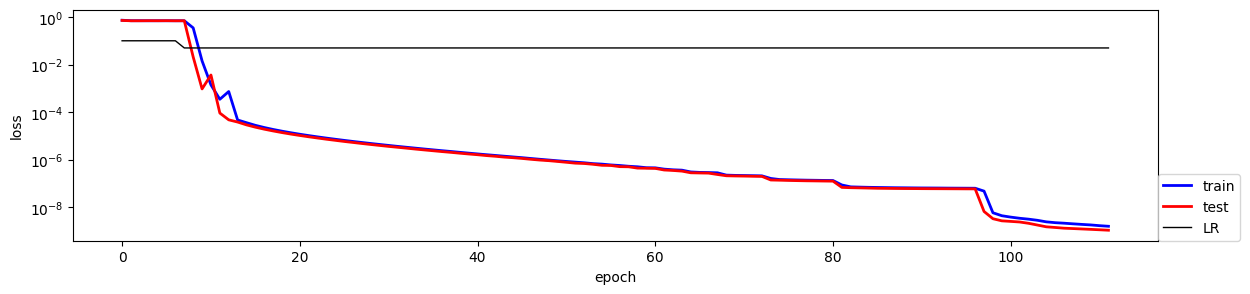

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 3))
# plt.plot(losses1*0 + baseline, '--', c='black', label='baseline', lw=1)
plt.plot(losses_train, c='blue', label='train', lw=2)
plt.plot(losses_val, c='red', label='test', lw=2)
plt.plot(lrs, c='black', label='LR', lw=1)
# plt.ylim([0.00, 0.5])
#plt.xlim([0, 1000])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc=(1,0))
plt.yscale('log')

In [16]:
evaluate(model, loader_val)


{'loss': 4.968334687873721e-08,
 'time': 0.06974291801452637,
 'y_pred': array([[ 12.004915, -12.285319],
        [ -9.295264,   9.942588],
        [ 11.828286, -12.105937],
        ...,
        [ -9.258816,   9.886257],
        [ 11.97808 , -12.258622],
        [ 11.909454, -12.184995]], dtype=float32)}

In [17]:
evaluate(model, loader_train)

{'loss': 0.0,
 'time': 0.19445586204528809,
 'y_pred': array([[ -9.263462,   9.885167],
        [ -9.289343,   9.931287],
        [ 12.006667, -12.289806],
        ...,
        [ 12.034743, -12.318867],
        [ 11.786528, -12.066648],
        [ -9.286688,   9.92595 ]], dtype=float32)}

In [18]:
x.shape, y.shape

(torch.Size([64, 100, 5]), torch.Size([64]))

In [19]:
model(x).shape

torch.Size([64, 2])

In [20]:
#model(x)
criterion(y_pred, y)

tensor(0., device='cuda:0', grad_fn=<NllLossBackward0>)

In [23]:
y_pred

tensor([[ -9.2374,   9.8622],
        [ -9.2990,   9.9440],
        [ -9.2752,   9.9048],
        [ -9.2388,   9.8699],
        [ 11.8951, -12.1754],
        [ -9.2433,   9.8766],
        [ 11.9054, -12.1820],
        [ -9.2372,   9.8463],
        [ 11.9334, -12.2097],
        [ -9.2561,   9.8866],
        [ -9.2579,   9.8824],
        [ 11.7622, -12.0442],
        [ -9.2632,   9.8835],
        [ -9.2873,   9.9358],
        [ 11.9998, -12.2795],
        [ 11.9090, -12.1909],
        [ 11.9852, -12.2678],
        [ -9.2839,   9.9267],
        [ 11.8435, -12.1162],
        [ -9.2703,   9.9007],
        [ -9.2617,   9.8873],
        [ -9.2650,   9.8979],
        [ -9.2898,   9.9313],
        [ -9.3360,  10.0138],
        [ -9.3082,   9.9673],
        [ -9.3290,   9.9975],
        [ -9.3171,   9.9803],
        [ -9.3064,   9.9538],
        [ 12.0043, -12.2881],
        [ 11.8908, -12.1665],
        [ 11.8547, -12.1349],
        [ 12.0021, -12.2788],
        [ 11.9291, -12.2030],
        [ 

In [22]:
y.view(-1)

tensor([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], device='cuda:0')

Text(0, 0.5, 'y_test')

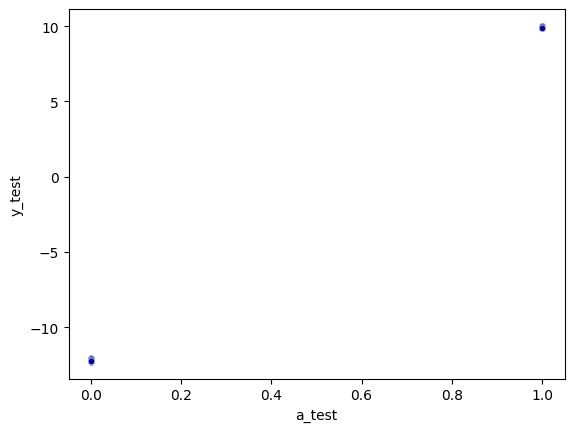

In [25]:
import matplotlib.pyplot as plt

plt.scatter(y.detach().cpu(), y_pred[:,1].detach().cpu(), 20, c='#000099', edgecolor='w', lw=0.3)
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.xlabel('a_test')
plt.ylabel('y_test')

In [39]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
criterion(input, target)

tensor(2.0359, grad_fn=<NllLossBackward0>)

In [40]:
input.shape, target.shape

(torch.Size([3, 5]), torch.Size([3]))

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (lstm1): LSTM(10, 15, batch_first=True)
  (lstm2): LSTM(15, 15, batch_first=True)
  (lstm3): LSTM(15, 15, batch_first=True)
  (fc1): Linear(in_features=15, out_features=20, bias=True)
  (selu): SELU()
  (fc2): Linear(in_features=20, out_features=1, bias=True)
)>

In [ ]:
model.state_dict()

OrderedDict([('lstm1.weight_ih_l0',
              tensor([[ 2.3691,  0.1396,  0.4923,  0.1850, -1.3851],
                      [ 0.4593, -0.2265, -0.7377, -0.6157,  2.0033],
                      [-0.3132, -0.7245, -0.7435,  1.3595,  1.4532],
                      [-0.8160,  1.9042,  2.0451, -0.5558, -0.9327],
                      [ 0.7395, -0.5750,  1.0253, -1.4760, -0.0801],
                      [ 1.3469, -0.0157, -1.2133, -0.5628,  2.1173],
                      [-1.6970, -0.0786,  1.6851,  2.1318, -0.9742],
                      [ 3.7862, -1.0595,  1.0969,  0.4552,  0.4550],
                      [-0.8935,  0.3697,  1.9799, -0.2781, -0.3437],
                      [ 0.3709,  0.4842,  1.1790, -1.2488, -1.3122],
                      [-4.3523, -0.8660,  0.0413,  0.1388,  5.1100],
                      [ 2.8889, -0.1103, -0.5787,  1.1574, -0.3502],
                      [-0.6150, -2.1661, -1.1791, -0.3736,  0.7584],
                      [-2.6125, -0.5180, -0.5100, -0.1359,  2.2983]

In [ ]:
def train():
    global epochs
    global logs
    traindata = dataloader(args.dataset_path,'train',args.mean_path, args.batch_size)
    model = timeNet(2, 18, 32, 3)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr= args.learning_rate)
    num_batches =  len(traindata)
    print('total batches : {}'.format(num_batches))
    for epoch in range(0, epochs):
        for index, (features,targets) in enumerate(traindata):
            inputs = Variable(features)
            targets = Variable(targets)
            outputs= model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            itrepoch = epoch + 1.* ((index + 1)/num_batches)
            logs['train_loss'].update(loss.data[0],itrepoch)
            if((index+1)% 5 == 0):
                print('Epoch = {}, Loss = {}'.format(epoch, loss.data[0]))
            del inputs,outputs, targets,features,loss
            gc.collect()


        print('----------Starting Test ----------------')
        model.eval()
        testacc, testloss = test(model, criterion)
        model.train()
        logs['test_loss'].update(testloss, epoch)
        logs['test_acc'].update(testacc, epoch)

        if((epoch + 1)% 5 ==0):
            torch.save(model.state_dict(), args.checkpoint_path + 'checkpoint_epoch_{}.pth'.format(epoch))
        with open(logfile, 'wb') as mylogger:
            dill.dump(logs, mylogger)
